In [11]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [16]:
# import array as arr
# img2 = [0. for i in range(len(img1))]
# for i in range(len(img1[:])):
#     for j in range(len(img1[i][:])):
#         r, g, b = img1[i][j][:]
#         img2[i][j] = 0.299 * r + 0.587 * g + 0.114 * b

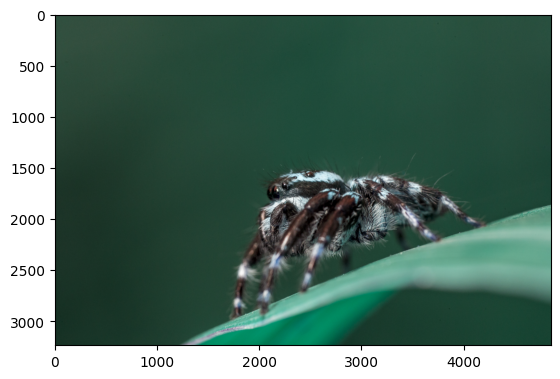

In [39]:
dir = "img03.jpeg"
img1 = cv2.imread(dir)
plt.imshow(img1)

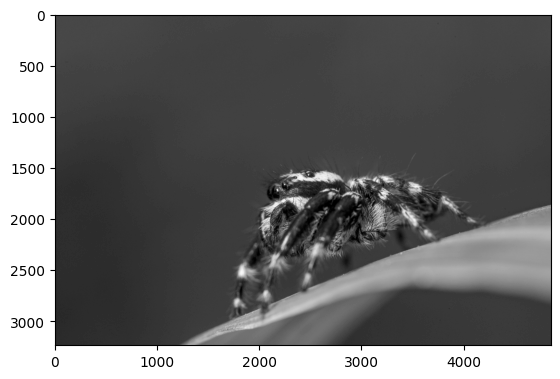

In [45]:
dir = "img03.jpeg"
img1 = cv2.imread(dir, 0)
plt.imshow(img1, cmap='gray')

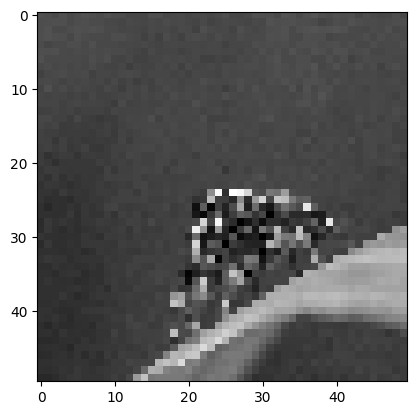

In [46]:
img2 = cv2.resize(img1, (50, 50))
plt.imshow(img2, cmap='gray')